In [1]:
import pandas as pd

In [6]:
movies = pd.read_csv("E:\\Data Analytics\\M_R_S\\Data\\movies.csv")
ratings = pd.read_csv("E:\\Data Analytics\\M_R_S\\Data\\ratings.csv")

In [7]:
print(movies.describe())

             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000


In [8]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [9]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [11]:
print(movies.shape)

(62423, 3)


In [12]:
print(movies.columns)


Index(['movieId', 'title', 'genres'], dtype='object')


In [13]:
print(movies.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


In [15]:
print(movies.duplicated().any())

False


In [16]:
print(ratings.describe())

              userId        movieId         rating     timestamp
count  900003.000000  900003.000000  900003.000000  9.000030e+05
mean    81248.108623   21388.102502       3.534094  1.215827e+09
std     46757.108395   39168.543993       1.060580  2.268870e+08
min         1.000000       1.000000       0.500000  8.228736e+08
25%     40636.000000    1197.000000       3.000000  1.011756e+09
50%     80974.000000    2948.000000       3.500000  1.199239e+09
75%    121530.000000    8636.000000       4.000000  1.447208e+09
max    162541.000000  209139.000000       5.000000  1.574327e+09


In [17]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900003 entries, 0 to 900002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     900003 non-null  int64  
 1   movieId    900003 non-null  int64  
 2   rating     900003 non-null  float64
 3   timestamp  900003 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 27.5 MB
None


In [18]:
print(ratings.head())

   userId  movieId  rating   timestamp
0   82584     2713     1.0   965273684
1   44057        1     5.0   835685705
2   35215     2716     3.5  1457136143
3  124739     7373     0.5  1469772819
4   45380     1196     5.0   949429384


In [19]:
print(ratings.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [20]:
print(ratings.shape)

(900003, 4)


In [21]:
print(ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [22]:
print(ratings.duplicated().any())

False


In [26]:
#merging both csv files import pandas as pd

# Load cleaned datasets
ratings = pd.read_csv("E:\\Data Analytics\\M_R_S\\Data\\movies.csv")
movies = pd.read_csv(r'E:\Data Analytics\M_R_S\Data\ratings.csv')

# Merge on 'movieId'
merged_df = pd.merge(ratings, movies, on='movieId')

# Save the merged dataset (optional)
merged_df.to_csv("E:\\Data Analytics\\M_R_S\\Data\\movies_ratings_merged.csv", index=False)


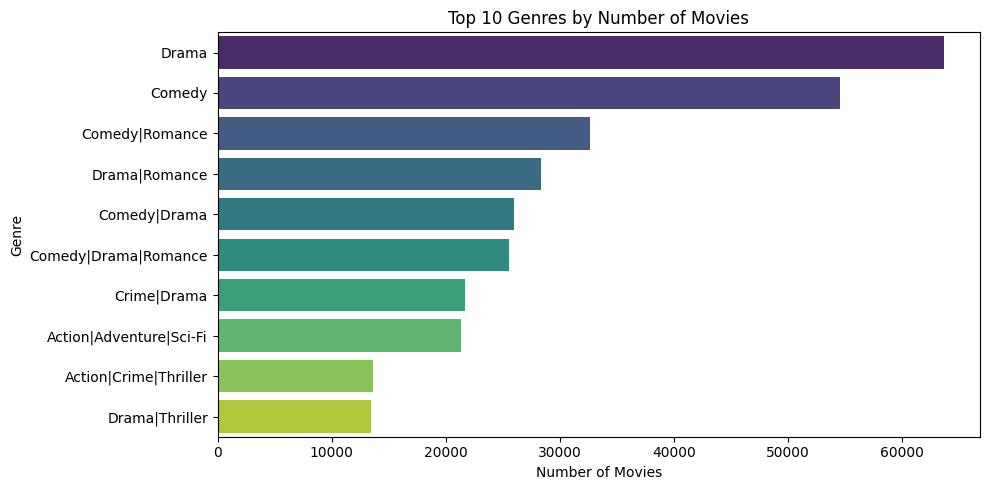

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode genres
df_exploded = merged_df.explode('genres')

# Count top 10 genres
genre_counts = df_exploded['genres'].value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Movie Count']

# Add dummy hue column (optional workaround)
genre_counts['hue'] = genre_counts['Genre']

# Plot without warning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=genre_counts,
    x='Movie Count',
    y='Genre',
    hue='Genre',             # Assign y to hue
    palette='viridis',
    dodge=False,
    legend=False             # Hide redundant legend
)
plt.title("Top 10 Genres by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


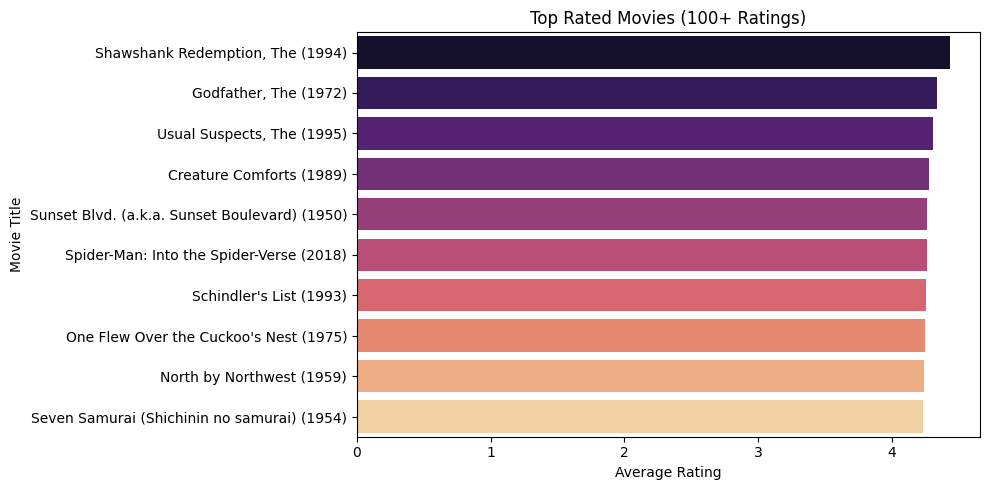

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by movie
movie_stats = merged_df.groupby('title').agg({
    'rating': ['mean', 'count']
})
movie_stats.columns = ['avg_rating', 'rating_count']

# Filter popular movies
popular_movies = movie_stats[movie_stats['rating_count'] >= 100].sort_values(by='avg_rating', ascending=False).head(10).reset_index()

# Add dummy hue column (same as movie title)
popular_movies['hue'] = popular_movies['title']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=popular_movies,
    x='avg_rating',
    y='title',
    hue='title',              # Set hue to y to avoid warning
    palette='magma',
    dodge=False,
    legend=False              # Hide the unnecessary legend
)
plt.title("Top Rated Movies (100+ Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


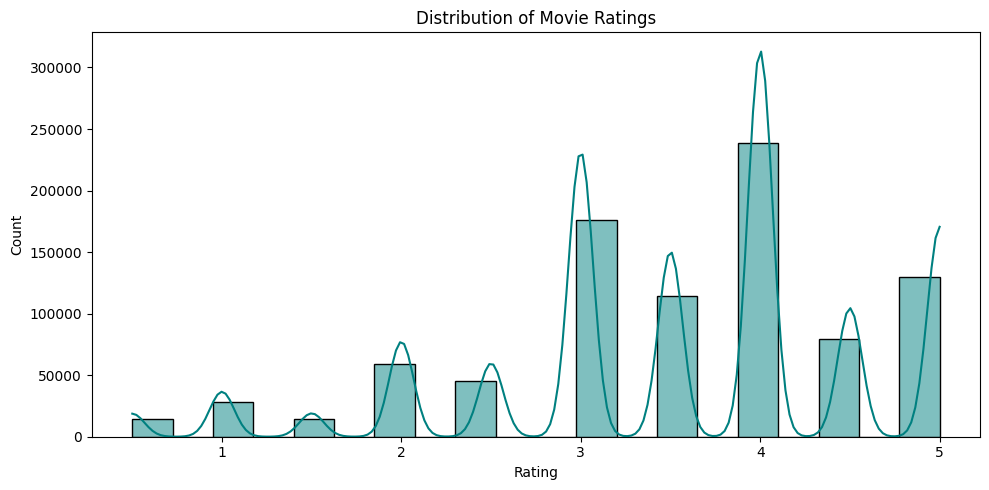

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(data=merged_df, x='rating', bins=20, kde=True, color='teal')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


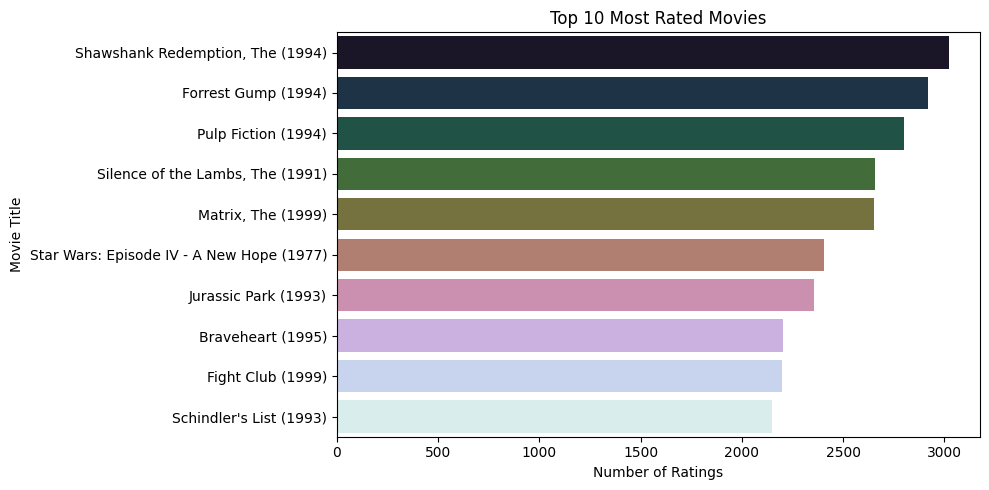

In [35]:
rating_counts = merged_df['title'].value_counts().head(10).reset_index()
rating_counts.columns = ['Movie Title', 'Number of Ratings']
rating_counts['hue'] = rating_counts['Movie Title']  # dummy hue

plt.figure(figsize=(10, 5))
sns.barplot(
    data=rating_counts,
    x='Number of Ratings',
    y='Movie Title',
    hue='Movie Title',
    palette='cubehelix',
    dodge=False,
    legend=False
)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


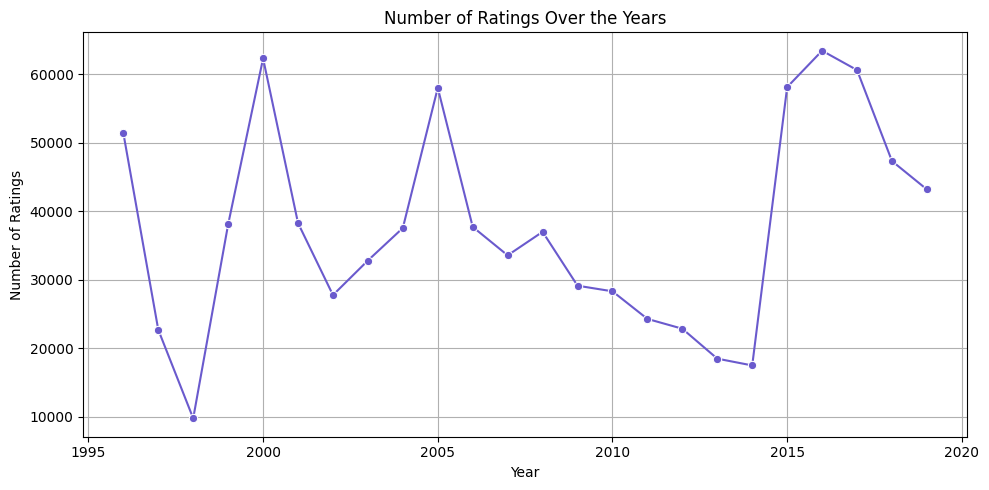

In [37]:
# Convert timestamp to datetime (if not already done)
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')
merged_df['year'] = merged_df['timestamp'].dt.year

# Count ratings per year
ratings_per_year = merged_df.groupby('year')['rating'].count().reset_index()
ratings_per_year.columns = ['Year', 'Number of Ratings']

plt.figure(figsize=(10, 5))
sns.lineplot(data=ratings_per_year, x='Year', y='Number of Ratings', marker='o', color='slateblue')
plt.title("Number of Ratings Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.tight_layout()
plt.show()
